In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
url=r"C:\Users\Divyansh\Desktop\30 days ml challenge\IPL winner Pred\IPL Ball-by-Ball 2008-2020.csv"
ballbyball=pd.read_csv(url)
url1=r"C:\Users\Divyansh\Desktop\30 days ml challenge\IPL winner Pred\IPL Matches 2008-2020.csv"
matches=pd.read_csv(url1)

In [3]:
ballbyball.head(141)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,335982,2,8,3,AA Noffke,CL White,AB Agarkar,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
137,335982,2,8,4,AA Noffke,CL White,AB Agarkar,0,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
138,335982,2,8,5,AA Noffke,CL White,AB Agarkar,0,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
139,335982,2,8,6,AA Noffke,CL White,AB Agarkar,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [4]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
ballbyball.shape

(193468, 18)

In [6]:
matches.shape

(816, 17)

In [7]:
total_score = ballbyball.groupby(["id", "inning"]).sum()["total_runs"].reset_index()
total_score["total_runs"] = total_score["total_runs"].apply(lambda x: x + 1)


In [8]:
total_score=total_score[total_score["inning"]==1]

In [9]:
total_score.head()

,id,inning,total_runs
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111


In [10]:
total_score.rename(columns={'total_runs': 'target'}, inplace=True)

In [11]:
total_score

,id,inning,target
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1620,1216547,1,202
1622,1237177,1,201
1624,1237178,1,132
1626,1237180,1,190


In [12]:
matches=matches.merge(total_score[["id","target"]],left_on="id",right_on="id")

In [13]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,target
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,241
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,111


In [14]:
matches["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  target          

In [16]:
matches.describe()


,id,neutral_venue,result_margin,target
count,8.160000e+02,816.000000,799.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,162.849265
std,3.058943e+05,0.292512,22.068427,30.382883
min,3.359820e+05,0.000000,1.000000,57.000000
25%,5.012278e+05,0.000000,6.000000,144.000000
50%,7.292980e+05,0.000000,8.000000,164.000000
75%,1.082626e+06,0.000000,19.500000,183.000000
max,1.237181e+06,1.000000,146.000000,264.000000


In [17]:
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
target               0
dtype: int64

In [18]:
matches=matches.drop(["method"],axis=1)

In [19]:
matches=matches.dropna()

In [20]:
matches.shape

(786, 17)

In [21]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [22]:
teams=[
    'Kolkata Knight Riders', 
    'Chennai Super Kings', 
    'Delhi Capitals',
    'Royal Challengers Bangalore',
    'Kings XI Punjab',
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Rajasthan Royals'
]

In [23]:
matches['team1']=matches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team2']=matches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['winner']=matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team1']=matches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2']=matches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner']=matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [24]:
matches=matches[matches["team1"].isin(teams)]
matches=matches[matches["team2"].isin(teams)]
matches=matches[matches["winner"].isin(teams)]

Text(0.5, 1.0, 'Number of IPL matches won by each team')

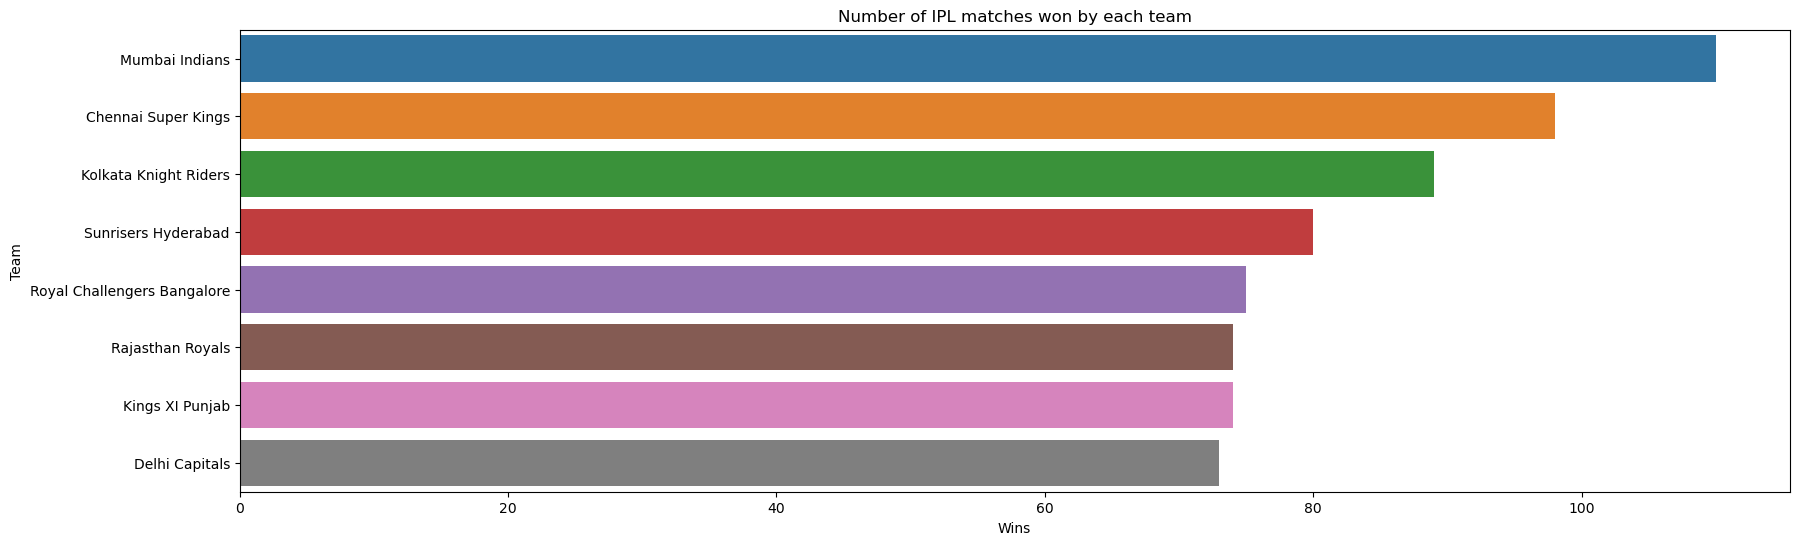

In [25]:
plt.figure(figsize = (20,6))
sns.countplot(y='winner', data=matches, order=matches['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

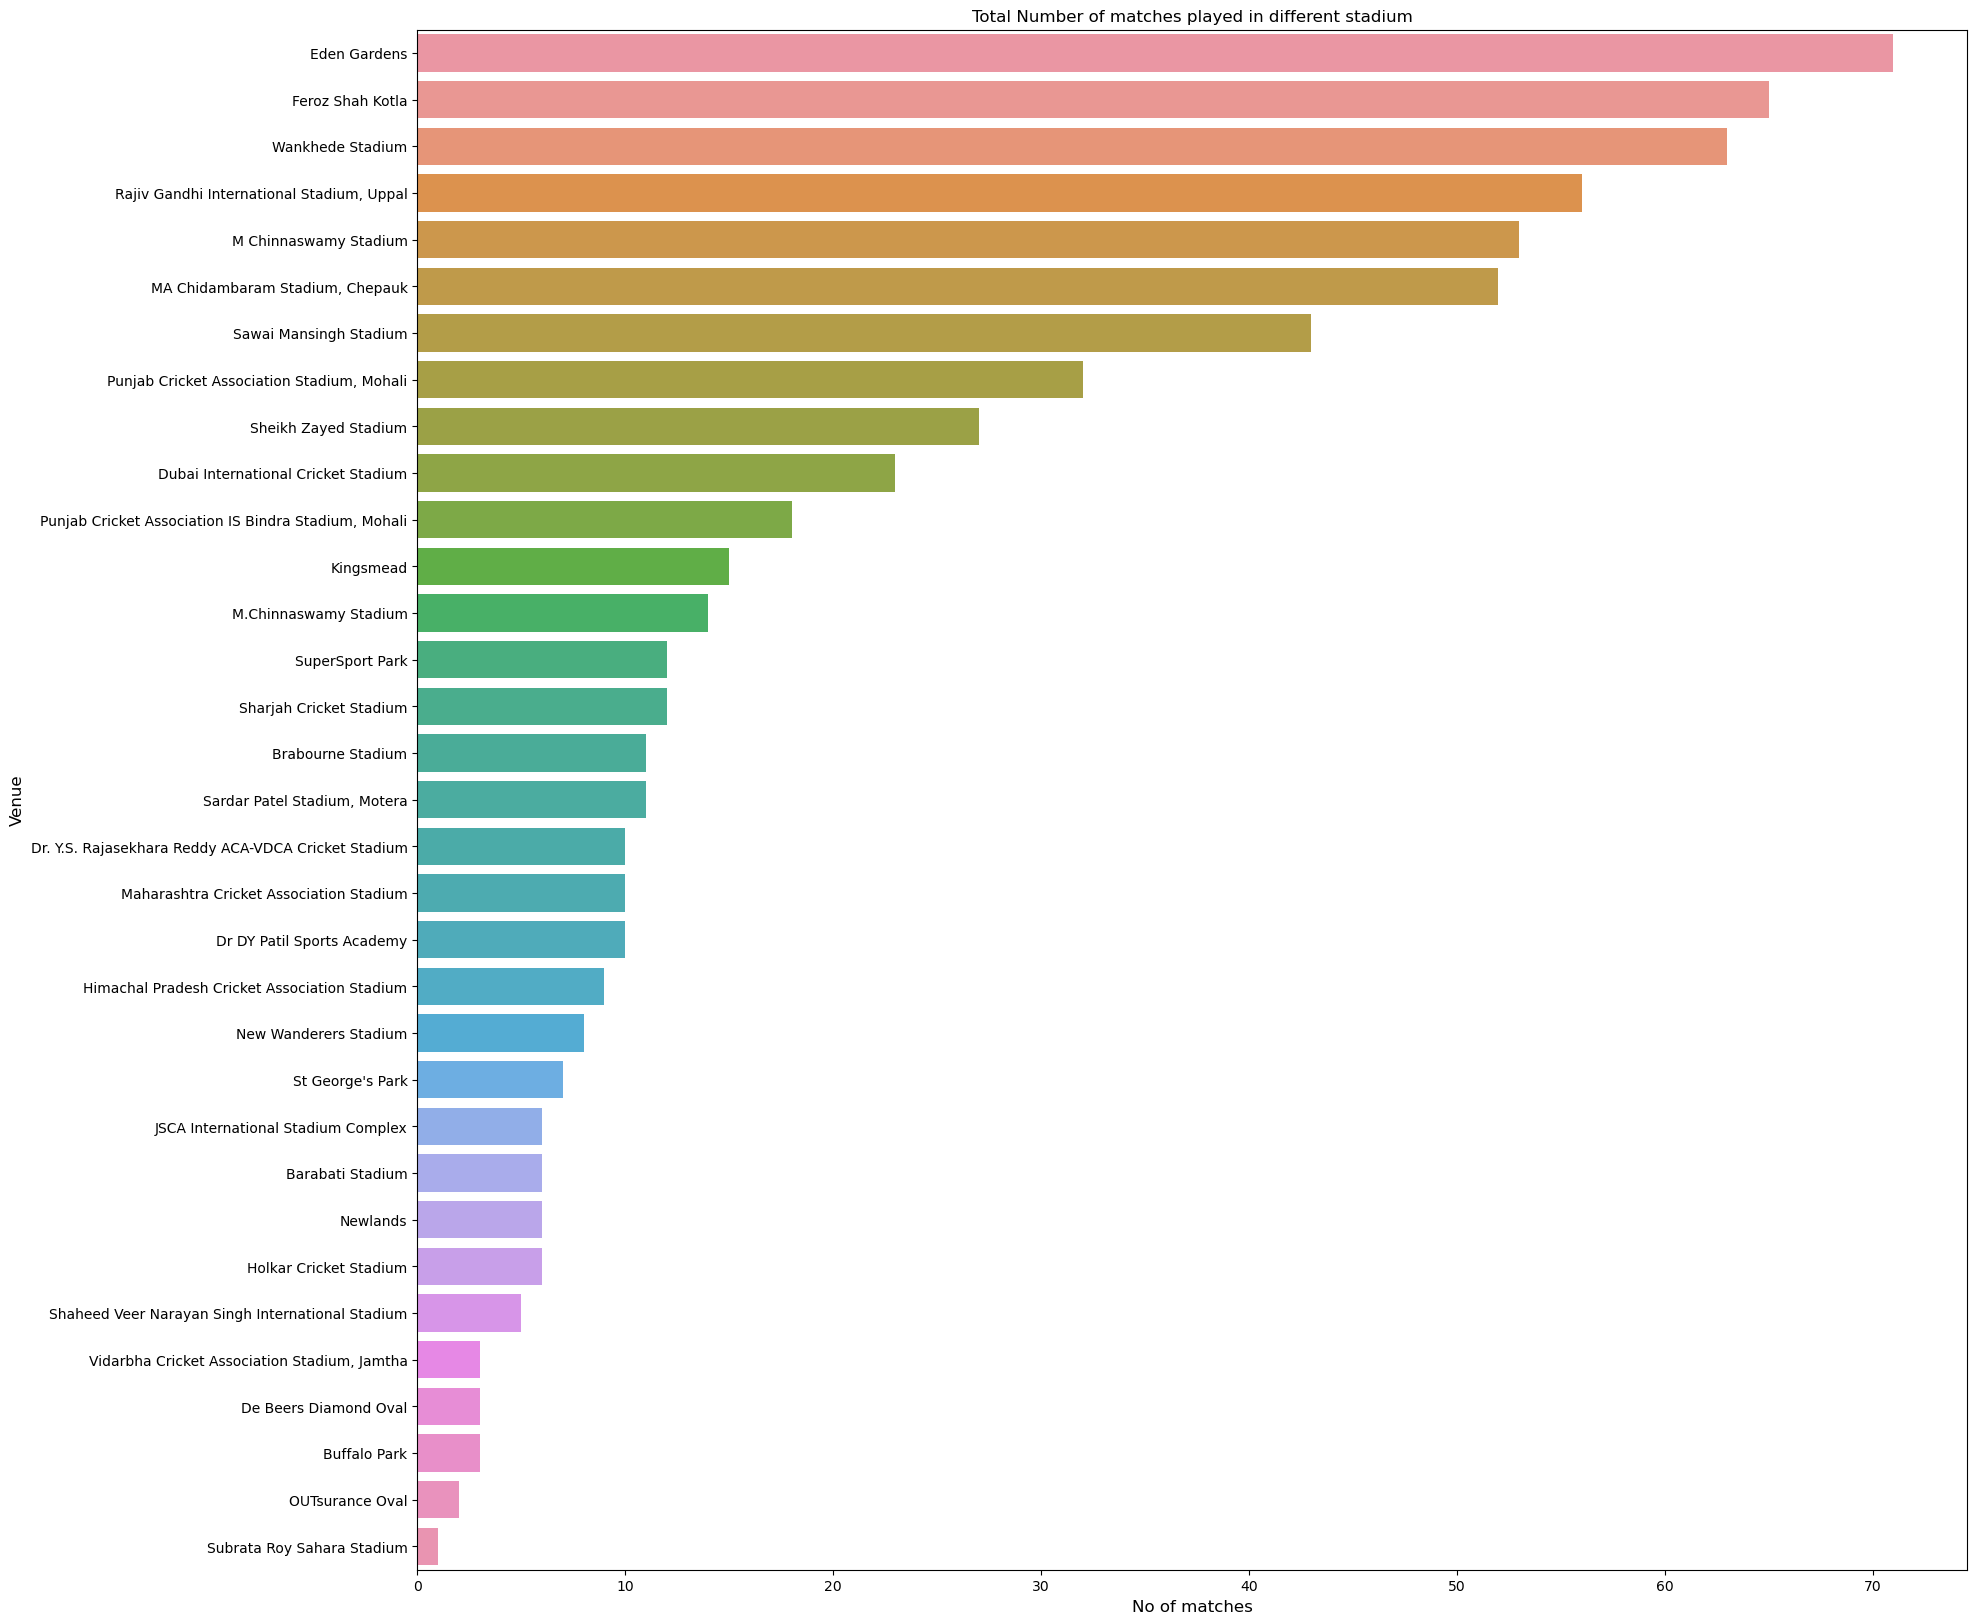

In [26]:
plt.figure(figsize = (20,20))
sns.countplot(y='venue', data=matches, order=matches['venue'].value_counts().index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decesion')

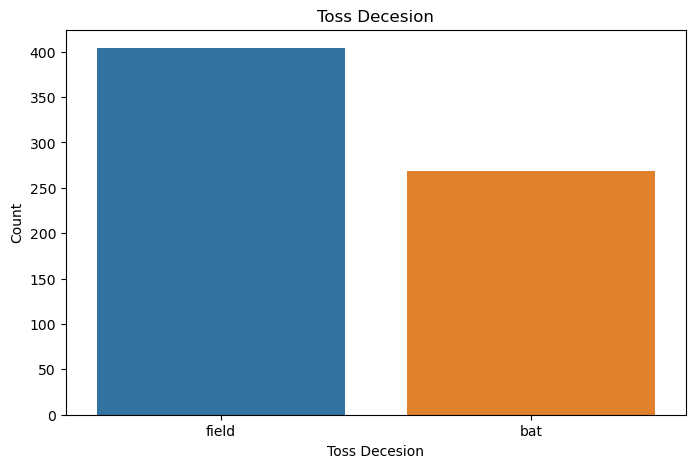

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='toss_decision', data=matches)
plt.xlabel('Toss Decesion', fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Toss Decesion')


In [28]:
x = ["city", "toss_decision", "result"]
for i in x:
 print("------------")
 print(matches[i].unique())
 print(matches[i].value_counts())

------------
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi' 'Abu Dhabi'
 'Bengaluru' 'Indore' 'Sharjah' 'Dubai']
Mumbai            84
Kolkata           71
Delhi             65
Hyderabad         56
Bangalore         53
Chennai           52
Chandigarh        50
Jaipur            43
Abu Dhabi         27
Dubai             23
Durban            15
Bengaluru         14
Centurion         12
Sharjah           12
Pune              11
Ahmedabad         11
Visakhapatnam     10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Cuttack            6
Ranchi             6
Cape Town          6
Indore             6
Raipur             5
Nagpur             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64
------------
['field' 

In [29]:
matches.shape

(673, 17)

In [30]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,target
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,223
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,241
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,130
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,166
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,111


In [31]:
matches=matches[["id","city","winner","target","toss_winner","toss_decision"]]

In [32]:
matches.head()

,id,city,winner,target,toss_winner,toss_decision
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field
1,335983,Chandigarh,Chennai Super Kings,241,Chennai Super Kings,bat
2,335984,Delhi,Delhi Capitals,130,Rajasthan Royals,bat
3,335985,Mumbai,Royal Challengers Bangalore,166,Mumbai Indians,bat
4,335986,Kolkata,Kolkata Knight Riders,111,Deccan Chargers,bat


In [33]:
ballbyball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [34]:
ballbyball.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [35]:
ballbyball=matches.merge(ballbyball,on="id")

In [36]:
ballbyball=ballbyball[ballbyball["inning"]==2]

In [37]:
ballbyball.shape

(77295, 23)

In [38]:
ballbyball.head()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
121,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,2,CL White,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
122,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,3,CL White,...,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
123,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,4,MV Boucher,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
124,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,5,MV Boucher,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
125,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,6,MV Boucher,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [39]:
ballbyball["current_score"]=ballbyball.groupby("id").cumsum()["total_runs"]

In [40]:
ballbyball["runs_left"]=ballbyball["target"]-ballbyball["current_score"]

In [41]:
ballbyball.head()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left
121,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,2,CL White,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223
122,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,3,CL White,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
123,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,4,MV Boucher,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221
124,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,5,MV Boucher,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220
125,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,6,MV Boucher,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220


In [42]:
ballbyball["balls_left"]=126-(ballbyball["over"]*6+ballbyball["ball"])

In [43]:
ballbyball.head()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
121,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,2,CL White,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,88
122,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,3,CL White,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,87
123,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,4,MV Boucher,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,86
124,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,5,MV Boucher,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,85
125,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,6,MV Boucher,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,84


In [44]:
wickets=ballbyball.groupby("id").cumsum()["is_wicket"].values
ballbyball["remain_wickets"]=10-wickets
ballbyball.head()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,remain_wickets
121,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,2,CL White,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,88,10
122,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,3,CL White,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,87,10
123,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,4,MV Boucher,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,86,10
124,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,5,MV Boucher,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,85,10
125,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,field,2,6,6,MV Boucher,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,84,10


In [45]:
ballbyball["Current_run_rate"]=ballbyball["current_score"]*6/(120-ballbyball["balls_left"])

In [46]:
ballbyball["required_run_rate"]=ballbyball["runs_left"]*6/(ballbyball["balls_left"])

In [47]:
ballbyball.tail()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,remain_wickets,Current_run_rate,required_run_rate
159943,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,17,6,HH Pandya,...,NaN,NaN,Mumbai Indians,Delhi Capitals,154,3,18,6,9.058824,1.000000
159944,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,1,HH Pandya,...,NaN,NaN,Mumbai Indians,Delhi Capitals,155,2,17,6,9.029126,0.705882
159945,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,2,Ishan Kishan,...,NaN,NaN,Mumbai Indians,Delhi Capitals,156,1,16,6,9.000000,0.375000
159946,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,3,HH Pandya,...,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,1,15,5,8.914286,0.400000
159947,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,4,KH Pandya,...,NaN,NaN,Mumbai Indians,Delhi Capitals,157,0,14,5,8.886792,0.000000


In [48]:
def result(row):
    return 1 if row["batting_team"]==row["winner"] else 0

In [49]:
ballbyball["result"]=ballbyball.apply(result,axis=1)

In [50]:
ballbyball.tail()

,id,city,winner,target,toss_winner,toss_decision,inning,over,ball,batsman,...,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,remain_wickets,Current_run_rate,required_run_rate,result
159943,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,17,6,HH Pandya,...,NaN,Mumbai Indians,Delhi Capitals,154,3,18,6,9.058824,1.000000,1
159944,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,1,HH Pandya,...,NaN,Mumbai Indians,Delhi Capitals,155,2,17,6,9.029126,0.705882,1
159945,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,2,Ishan Kishan,...,NaN,Mumbai Indians,Delhi Capitals,156,1,16,6,9.000000,0.375000,1
159946,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,3,HH Pandya,...,NaN,Mumbai Indians,Delhi Capitals,156,1,15,5,8.914286,0.400000,1
159947,1237181,Dubai,Mumbai Indians,157,Delhi Capitals,bat,2,18,4,KH Pandya,...,NaN,Mumbai Indians,Delhi Capitals,157,0,14,5,8.886792,0.000000,1


In [51]:
dataset=ballbyball[["batting_team","bowling_team","city","toss_winner","toss_decision","runs_left","balls_left","remain_wickets","target","Current_run_rate","required_run_rate","result"]]

In [52]:
dataset.head()

,batting_team,bowling_team,city,toss_winner,toss_decision,runs_left,balls_left,remain_wickets,target,Current_run_rate,required_run_rate,result
121,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,field,223,88,10,223,0.000000,15.204545,0
122,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,field,222,87,10,223,0.181818,15.310345,0
123,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,field,221,86,10,223,0.352941,15.418605,0
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,field,220,85,10,223,0.514286,15.529412,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,field,220,84,10,223,0.500000,15.714286,0


In [53]:
dataset=dataset.sample(dataset.shape[0])

In [54]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [55]:
X.isnull().sum()

batting_team          0
bowling_team          0
city                  0
toss_winner           0
toss_decision         0
runs_left             0
balls_left            0
remain_wickets        0
target                0
Current_run_rate     16
required_run_rate     0
dtype: int64

In [56]:
X=X[X["balls_left"]!=0]

In [57]:

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ("trf",OneHotEncoder(sparse=False,drop="first"),["batting_team","bowling_team","city","toss_winner","toss_decision"])], remainder="passthrough")
X=np.array(trf.fit_transform(X))

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [59]:
dataset.describe()

,runs_left,balls_left,remain_wickets,target,Current_run_rate,required_run_rate,result
count,77295.000000,77295.000000,77295.000000,77295.000000,7.727900e+04,77295.000000,77295.000000
mean,90.902206,68.942415,7.164733,166.016870,inf,11.362318,0.460379
std,50.699553,33.382214,2.443571,28.921758,NaN,13.938600,0.498431
min,-15.000000,3.000000,0.000000,68.000000,-1.068000e+03,-3.333333,0.000000
25%,50.000000,41.000000,6.000000,148.000000,4.207344e+00,4.448276,0.000000
50%,90.000000,70.000000,8.000000,166.000000,8.040000e+00,8.189189,0.000000
75%,130.000000,98.000000,9.000000,185.000000,1.458824e+01,13.200000,1.000000
max,247.000000,125.000000,10.000000,247.000000,inf,398.000000,1.000000


In [60]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier()
cat_classifier.fit(X_train, y_train)

Learning rate set to 0.059951
0:	learn: 0.6414659	total: 142ms	remaining: 2m 21s
1:	learn: 0.5984121	total: 149ms	remaining: 1m 14s
2:	learn: 0.5599212	total: 157ms	remaining: 52.2s
3:	learn: 0.5355074	total: 165ms	remaining: 41s
4:	learn: 0.5117182	total: 173ms	remaining: 34.4s
5:	learn: 0.4927294	total: 181ms	remaining: 29.9s
6:	learn: 0.4764716	total: 189ms	remaining: 26.8s
7:	learn: 0.4616031	total: 198ms	remaining: 24.5s
8:	learn: 0.4507736	total: 209ms	remaining: 23s
9:	learn: 0.4419640	total: 217ms	remaining: 21.5s
10:	learn: 0.4331973	total: 226ms	remaining: 20.3s
11:	learn: 0.4252703	total: 239ms	remaining: 19.6s
12:	learn: 0.4155571	total: 249ms	remaining: 18.9s
13:	learn: 0.4095348	total: 259ms	remaining: 18.2s
14:	learn: 0.4033984	total: 268ms	remaining: 17.6s
15:	learn: 0.3981322	total: 278ms	remaining: 17.1s
16:	learn: 0.3919301	total: 286ms	remaining: 16.6s
17:	learn: 0.3867716	total: 296ms	remaining: 16.1s
18:	learn: 0.3817442	total: 305ms	remaining: 15.7s
19:	learn: 0.

In [61]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=cat_classifier,X=X_train,y=y_train,cv=10)
print("Accuracy : {:.2f}%".format(accuracy.mean()*100))
print("Standerd Deviation:{}".format(accuracy.std()))

Learning rate set to 0.057313
0:	learn: 0.6439469	total: 8.73ms	remaining: 8.72s
1:	learn: 0.6001644	total: 16ms	remaining: 7.96s
2:	learn: 0.5647617	total: 23.7ms	remaining: 7.88s
3:	learn: 0.5408275	total: 30.8ms	remaining: 7.68s
4:	learn: 0.5172372	total: 38.7ms	remaining: 7.69s
5:	learn: 0.4986119	total: 45.3ms	remaining: 7.5s
6:	learn: 0.4825610	total: 52.2ms	remaining: 7.41s
7:	learn: 0.4673580	total: 59.4ms	remaining: 7.37s
8:	learn: 0.4566430	total: 66.4ms	remaining: 7.31s
9:	learn: 0.4469041	total: 73.4ms	remaining: 7.26s
10:	learn: 0.4349361	total: 80.1ms	remaining: 7.2s
11:	learn: 0.4275385	total: 86.9ms	remaining: 7.15s
12:	learn: 0.4187152	total: 93.3ms	remaining: 7.08s
13:	learn: 0.4121471	total: 100ms	remaining: 7.05s
14:	learn: 0.4064740	total: 107ms	remaining: 7s
15:	learn: 0.4006423	total: 114ms	remaining: 6.99s
16:	learn: 0.3963243	total: 120ms	remaining: 6.94s
17:	learn: 0.3924085	total: 127ms	remaining: 6.91s
18:	learn: 0.3873677	total: 133ms	remaining: 6.89s
19:	l